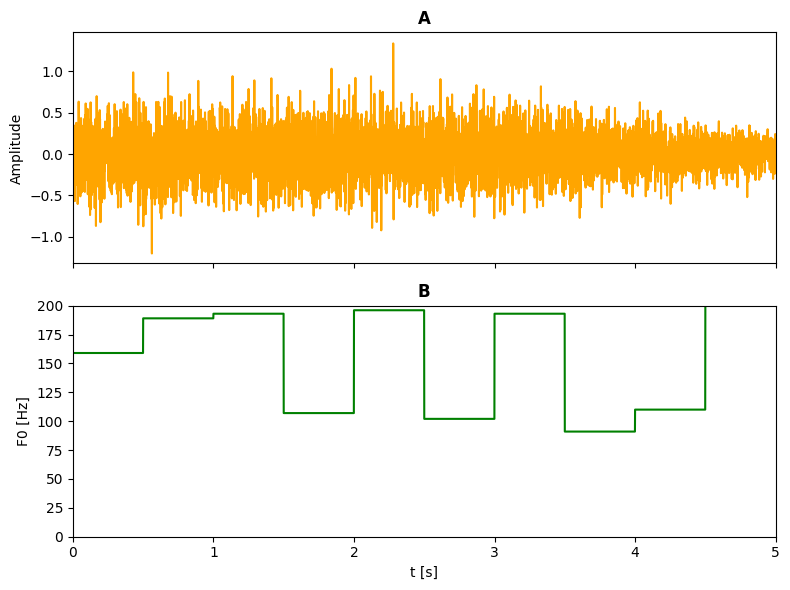

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------
# 1) Generate synthetic data (mimicking an audio amplitude + pitch track)
# ---------------------------------------------------------------------------
fs = 1000  # sample rate in Hz
t = np.linspace(0, 5, fs*5, endpoint=False)  # time from 0 to 5 seconds

# Top subplot data: random amplitude (larger initially, decaying slightly)
amplitude = 0.3 * np.random.randn(len(t))
# Make amplitude fade a bit after 3 seconds for a shape similar to the example
fade_start = 3  # seconds
fade_idx = int(fade_start * fs)
amplitude[fade_idx:] *= np.linspace(1, 0.4, len(amplitude[fade_idx:]))

# Bottom subplot data: synthetic pitch track (jumping between 80–200 Hz)
pitch = np.zeros_like(t)
segment_len = fs // 2  # 0.5-second segments
num_segments = len(t) // segment_len
for i in range(num_segments):
    val = np.random.randint(80, 201)  # pick random pitch between 80 and 200
    start = i * segment_len
    end = start + segment_len
    pitch[start:end] = val

# ---------------------------------------------------------------------------
# 2) Create the figure with two subplots
# ---------------------------------------------------------------------------
fig, (axA, axB) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# --- Top subplot (A) ---
axA.plot(t, amplitude, color='orange')
axA.set_ylabel('Amplitude')
axA.set_xlim([0, 5])
# Make y-limits a bit bigger than actual data
axA.set_ylim([1.1*amplitude.min(), 1.1*amplitude.max()])
# Title 'A' at the top center
axA.set_title('A', loc='center', fontweight='bold')
axA.grid(False)

# --- Bottom subplot (B) ---
axB.plot(t, pitch, color='green')
axB.set_ylabel('F0 [Hz]')
axB.set_xlabel('t [s]')
axB.set_xlim([0, 5])
axB.set_ylim([0, 200])  # matches your example’s ~0–200 Hz range
axB.set_title('B', loc='center', fontweight='bold')
axB.grid(False)

plt.tight_layout()
plt.show()
